<a href="https://colab.research.google.com/github/aoluwar/DATA-SCIENCE-/blob/main/DONATION_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#importing necessary libraries
#
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import sklearn
import io
import requests
import os

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#module for training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [20]:
# model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
#reading file
trainset = pd.read_csv("/content/blood-train.csv")
testset = pd.read_csv("/content/blood-test.csv")

In [38]:
#printing the first 10 row
trainset.head(10)

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
5,335,4,4,1000,4,0
6,47,2,7,1750,14,1
7,164,1,12,3000,35,0
8,736,5,46,11500,98,1
9,436,0,3,750,4,0


In [39]:
#checking for the train dataset shape/size
trainset.shape

(576, 6)

In [41]:
#checking for the test dataset shape/size
testset.shape


(200, 5)

In [50]:
#counting people that donate the first month
trainset["Months since First Donation"].value_counts()

16    42
4     39
14    34
2     31
28    29
      ..
36     1
17     1
29     1
78     1
31     1
Name: Months since First Donation, Length: 75, dtype: int64

In [47]:
#counting people that donate and people that doesn't
trainset["Made Donation in March 2007"].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [66]:
#storing variable in y
Y = trainset.iloc[:,-1]
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [54]:
trainset.tail()


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [58]:
traindata=trainset
train=trainset.iloc[:,1:5]
test=testset.iloc[:,1:5]

In [59]:
train.tail()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
571,23,1,250,23
572,16,3,750,86
573,21,2,500,52
574,39,1,250,39
575,72,1,250,72


In [60]:
#merging two dataset together
df=pd.merge(train,testset)

In [61]:
df.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Unnamed: 0
0,2,2,500,4,65
1,2,2,500,4,65
2,2,2,500,4,65
3,2,2,500,4,65
4,2,2,500,4,65


In [67]:
#setting dependent and independent variable
X=df.iloc[:,:]
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Unnamed: 0
0,2,2,500,4,65
1,2,2,500,4,65
2,2,2,500,4,65
3,2,2,500,4,65
4,2,2,500,4,65


DATA EXPLORATION ANALYSIS

In [63]:
#DATA STATS
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


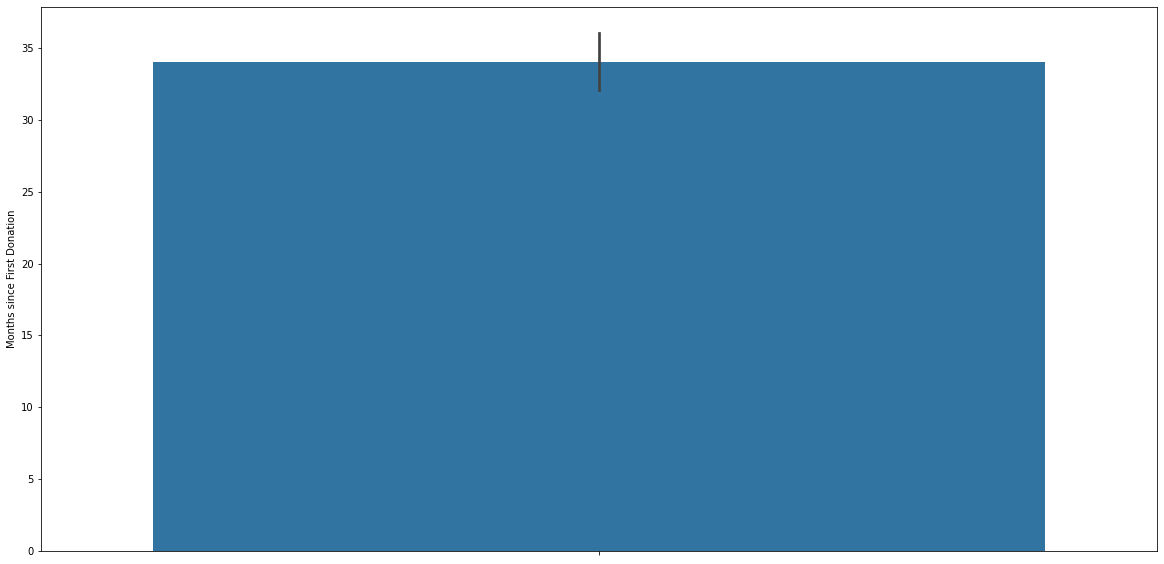

In [72]:
#barplot for months since last donation
plt.figure(figsize=(20,10))
sns.barplot(y="Months since First Donation",data=trainset)

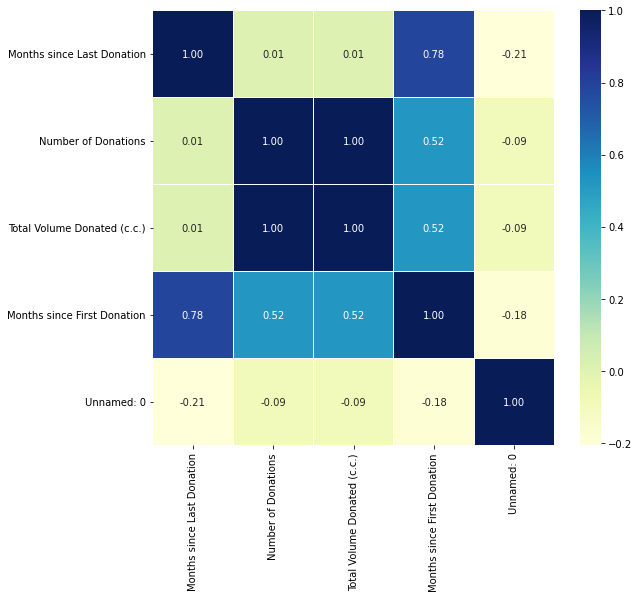

In [73]:
#Correlation between all variables [Checking how different variable are related]
corrmat=X.corr()
f, ax = plt.subplots(figsize =(10, 9)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True)

In [74]:
#Printing all unique value for Month Since Last donation
train["Months since Last Donation"].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72])

In [75]:
#Creating new variable for calculating how many times a person have donated
X["Donating for"] = (X["Months since First Donation"] - X["Months since Last Donation"])

In [76]:
#Seeing first five rows of the DataFrame
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Unnamed: 0,Donating for
0,2,2,500,4,65,2
1,2,2,500,4,65,2
2,2,2,500,4,65,2
3,2,2,500,4,65,2
4,2,2,500,4,65,2


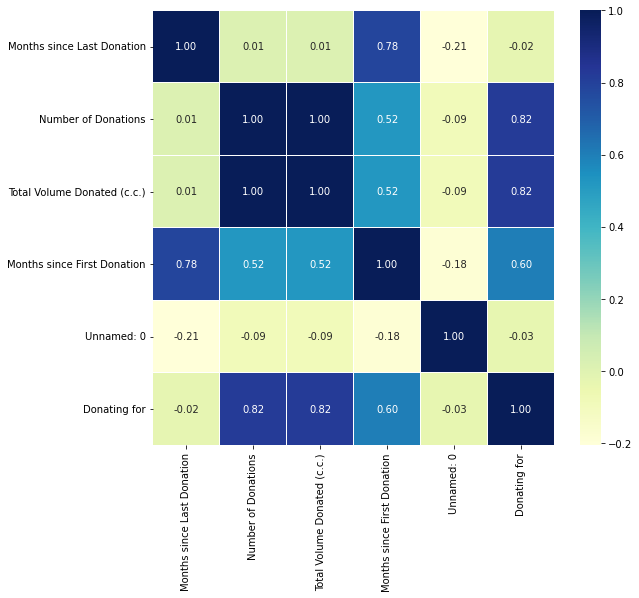

In [77]:
#Correlation between all variables
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

In [78]:
#Dropping the unnecessary column
X.drop([ 'Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [79]:
X.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Unnamed: 0,Donating for
0,2,2,4,65,2
1,2,2,4,65,2
2,2,2,4,65,2
3,2,2,4,65,2
4,2,2,4,65,2


In [80]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

#Fitting and transforming data
X=scale.fit_transform(X)


In [81]:
train=X[:576]

In [82]:
train.shape

(576, 5)

In [83]:
test=X[576:]

In [84]:
Y=Y[:576]

In [85]:
Y.shape

(576,)

MODEL BUILDING

In [86]:
#Splitting into train and test set
xtrain,xtest,ytrain,ytest=train_test_split(train,Y,test_size=0.2,random_state=0)

LOGISTIC REGRESSION

In [87]:
#Building the model
logreg = LogisticRegression(random_state=7)
#Fitting the model
logreg.fit(xtrain,ytrain)

LogisticRegression(random_state=7)

In [88]:
#Predicting on the test data
pred=logreg.predict(xtest)

In [89]:
accuracy_score(pred,ytest)

0.6982758620689655

In [90]:
#Printing the roc_auc_score
roc_auc_score(pred,ytest)

0.6008771929824561

SVM

In [91]:
### SVC classifier
SVMC = SVC(probability=True)
#Fitting the model
SVMC.fit(train,Y)

SVC(probability=True)

In [92]:
#Predicting on the test data
pred=SVMC.predict(xtest)

In [93]:
accuracy_score(pred, ytest)

0.7844827586206896

In [94]:
#Printing the confusion matrix
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]])

In [95]:
#Printing the roc auc score
roc_auc_score(pred,ytest)

0.8429487179487177